## Observations and Insights 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
#View headers on data files
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [3]:
#View headers on data files
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [4]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

In [5]:
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].count()

1893

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_only_df = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'])]

dup_mice_only_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"]!= "g989"]

clean_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_df['Mouse ID'].count()

1880

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean = clean_mouse_study_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = clean_mouse_study_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_var = clean_mouse_study_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std = clean_mouse_study_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = clean_mouse_study_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

tumor_summary_df = pd.DataFrame({"Mean": tumor_mean,
                                "Median": tumor_median,
                                "Variance": tumor_var,
                                "Standard Deviation": tumor_std,
                                "SEM": tumor_sem})
tumor_summary_df = tumor_summary_df.rename(index={0: 'Tumor Volume (mm3)'})

tumor_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
#Print Drug Regimen
print(clean_mouse_study_df['Drug Regimen'].unique())

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


#drug_group_df = drug_group_df.rename(index={0: 'Capomulin' ,1: 'Ceftamin', 2: 'Infubinol',
                                            #3: 'Ketapril',4: 'Naftisol',5: 'Placebo',6: 'Propriva',
                                            #7: 'Ramicane',8: 'Ramicane', 9: 'Stelasyn',10: 'Zoniferol'})      
# Using the aggregation method, produce the same summary statistics in a single line

summary_table = clean_mouse_study_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

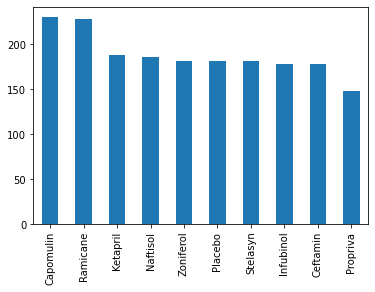

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_count = clean_mouse_study_df['Drug Regimen'].value_counts()


mouse_count.plot(kind="bar")
plt.show()

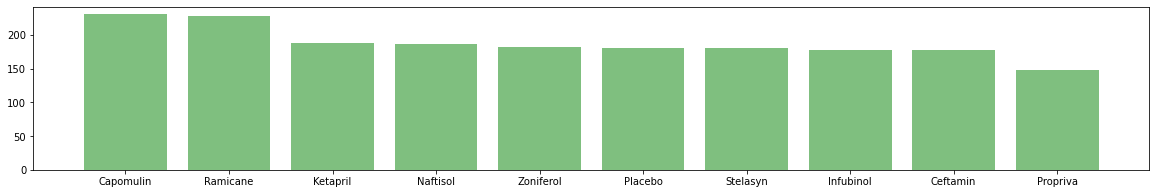

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(20,3))
plt.bar(mouse_count.index.values, mouse_count.values, color='g', alpha=0.5, align="center")
plt.show()


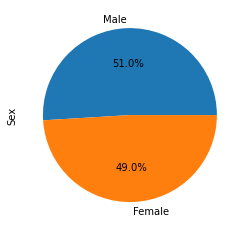

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_count = clean_mouse_study_df['Sex'].value_counts()


mouse_count.plot(kind="pie", autopct='%1.1f%%')
plt.show()


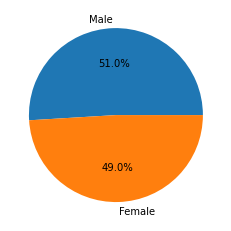

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_count.values, labels=mouse_count.index.values, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_data = clean_mouse_study_df.groupby(['Mouse ID']).max()['Timepoint']
final_data = final_data.reset_index()

final_data
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_data = final_data.merge(clean_mouse_study_df, on=['Mouse ID','Timepoint'], how="left")
merge_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
drugs =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = merge_data.loc[merge_data["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print(f"{drug} {outlier}")

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


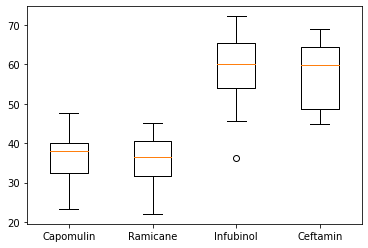

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list, labels=drugs)
plt.show()

## Line and Scatter Plots

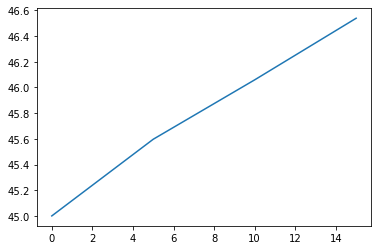

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"]=='Capomulin']
#Plotting r157

mouse_data = capomulin.loc[capomulin['Mouse ID']=='r157']
mouse_data

plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])
plt.show()

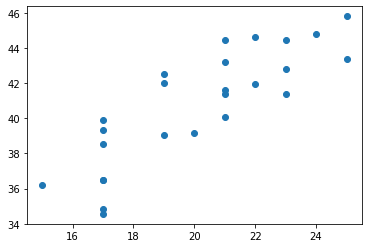

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin.groupby(['Mouse ID']).mean()
capomulin_avg

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


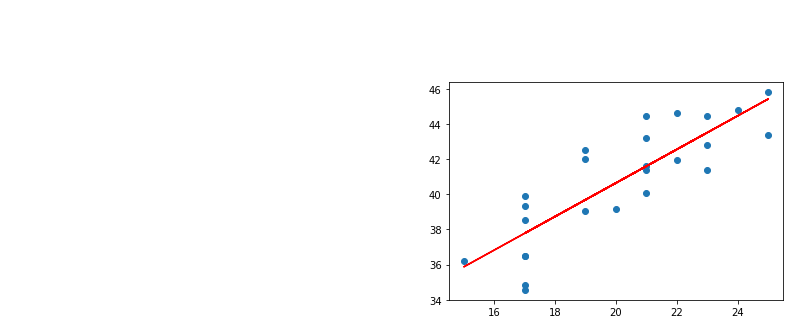

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel
plt.ylabel
print(f"The r-squared is: {rvalue**2}")
plt.show()